# Predictive Analytics_Predict Gym-Member Churn

## Project description

We work as an Consultant to help Gyms predicting the Membership-Churn of their respective members based on the members behavior. For this, we write a predictive modell using machine learning.
Finally, we'll use our findings to consult the Gyms on how to improve their Member-Retention.

---

<a id='top'></a>

## Table of content:

#### [1. Importing Libraries](#import) 
#### [2. Loading Data](#Data1) 
[2.1 Loading Dataset](#loading_dataset1)  
[2.2 Studying Dataset](#study1)  
  
#### [3. Exploratory Data Analysis](#EDA1)
[3.1 Describing Dataset](#convert_data1)  
[3.2 Graphs by Churn](#merged_dataset1) <br>
[3.3 Bar histogram](#prep_call_data1) <br>
[3.4 correlation matrix heatmap](#prep_internet_data1) <br>

#### [4. Building model for predicting churn](#model1)
  
#### [5. User cluster](#cluster1)
[5.1 Standardize the data](#testing1)  <br>
[5.2 Dendrogram](#average_rev_by_plans1) <br>
[5.3 K-means](#average_rev_by_regions1) <br>
[5.4 Mean features for the clusters](#average_rev_by_regions1) <br>
[5.5 Distribution of features for the clusters](#average_rev_by_regions1) <br>
[5.6 Churn rate for each user](#conclusion_hypo1) <br>

#### [6. Final Conclusion and recoomendations](#final_concl)

<a id='import'></a>

### 1. Importing Libraries

In [1]:
!pip install -qU seaborn

In [2]:
!pip install -qU matplotlib

In [3]:
from functools import reduce
from io import BytesIO
import requests
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

import warnings

warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 10)

# some global constats for formatting the output string
BOLD = '\033[1m'
END = '\033[0m'

<a id='Data1'></a>
<a id='Data2'></a>

## 2. Loading Data

#### Quick Links:
[2.1 Loading Dataset](#loading_dataset2)  
[2.2 Studying Dataset](#study2)  

<a id='loading_dataset1'></a>
<a id='loading_dataset2'></a>

### 2.1 Loading Dataset

In [4]:
try:
    us_gym_churn = pd.read_csv(r'/datasets/gym_churn_us.csv')
except:
    dataset_id = '1pndjTcTVAiZYH_rYNP8MiTg7Wn-rb3betAmoX0dN7XU'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(dataset_id)
    r = requests.get(file_name)
    us_gym_churn = pd.read_csv(BytesIO(r.content))

We loaded our data successfully, so we are good to go!

### 2.2 Studying Dataset

In [5]:
# displaying the data
display(us_gym_churn.info(),
        us_gym_churn.head(),
        us_gym_churn.tail(),
        us_gym_churn.duplicated().sum()
       )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12,1,1.101832,1.035270,0


0

According to the dataset, the gym counts 4K Members in their system. We gou varios information, most of them were boolean types in the club systems, since the only values in such columns are 0 and 1.
<br>
Also, it seems that we dont have missing data in our dataset.

In [6]:
# changing column title to lower string 
us_gym_churn.columns = us_gym_churn.columns.str.lower()
display(us_gym_churn)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0


Luckily, we don't need to apply major preprocessing, but changing the column titles into lower string will come in handy at later stage of our work.

---
[Back to top](#top) | [Back to Chapterstart: Loading Data](#Data2)

<a id='calls1'></a>
<a id='calls2'></a>

## 3 Exploratory Data Analysis

#### Quick Links:
[3.1 Describing Dataset](#convert_data1)  
[3.2 In detail: Customer churn](#merged_dataset1) <br>
[3.3 correlation matrix](#prep_internet_data1) <br>

### 3.1 Describing Dataset

In [7]:
us_gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Conclusion

After looking the detail, we can conclude that there are more men then women. Most of customers lives near the  gym. Almost half of the employee belongs to the partner company. Most of the customer does not come from any friends reference. Almost all the customer have shared their mobile number. Very few customers register for contract of more than 6 months. Generally customers are not intertested for taking part in group sessions. Average age of customer is 29 years. On an average customer pays 150 for additional charges. On an average customer have 5 months remaining in completion of the contract. Most of the customer have completed 4 months in the gym. On an average customer usually visited twice a week. The average churn rate of the customers is low i.e 0.2 which means usually customer stays with gym and don't think of unsubscribing their membership.

### 3.2 In detail: Customer churn

In [8]:
us_gym_churn.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### Conclusion

Churn 0 means customer who did not churn (who are still registered with the gym) and 1 means those customer who churned (who left the gym). Follwoing are the observations which we found on churn basis:

1. Both men and womens are almost equally divided between the groups who have left the gym and those who are still registred.
2. Phone number has been provided by maximum customer so here it does not make any impact. Customer who live near to the gym churn less.<br>
3. Customers who come from partner company churn less <br>
4. Customer who got promo code from their friends also churn less.<br>
5. Customers who want to continue generally have 6 months contract, they like to participate in group sessions, their average age is 30, they pay approx. 158 to other gym services like cafe, athletic goods, cosmetics, massages, etc., they have 5 months remaining until their contract expires. On an average their lifetime is 5 months and at last these customer generally visits twice a week. <br>
6. Customer who does not wants to continue generally have 2 months contract, they don't want to come in group discussion, their average age is 27, they pay approx. 115 to other gym services like cafe, athletic goods, cosmetics, massages, etc., They have approx. 2 month remaining untill their contract expire. On an average their lifetime is 1 month and at last these customer generally visit once in a week.

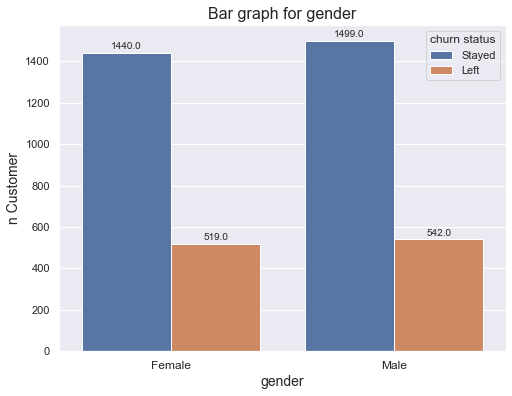

,gender,churn,count,churn status
0,0,0,1440,Stayed
1,0,1,519,Left
2,1,0,1499,Stayed
3,1,1,542,Left


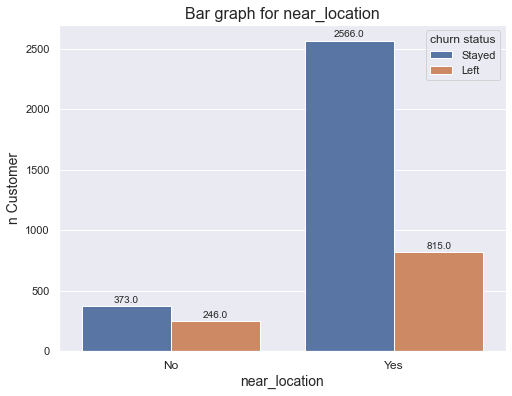

,near_location,churn,count,churn status
0,0,0,373,Stayed
1,0,1,246,Left
2,1,0,2566,Stayed
3,1,1,815,Left


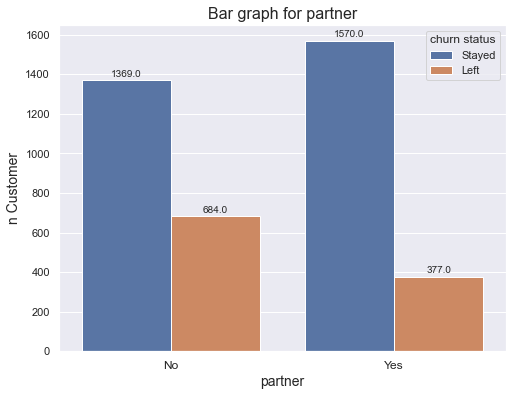

,partner,churn,count,churn status
0,0,0,1369,Stayed
1,0,1,684,Left
2,1,0,1570,Stayed
3,1,1,377,Left


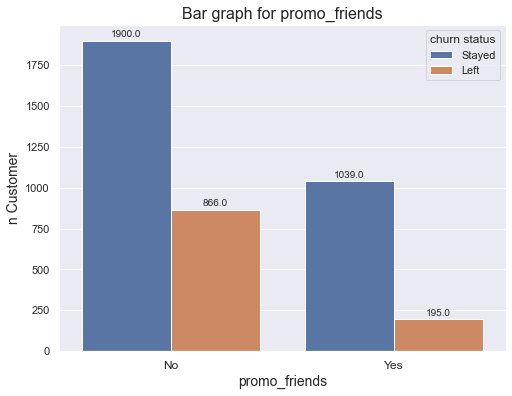

,promo_friends,churn,count,churn status
0,0,0,1900,Stayed
1,0,1,866,Left
2,1,0,1039,Stayed
3,1,1,195,Left


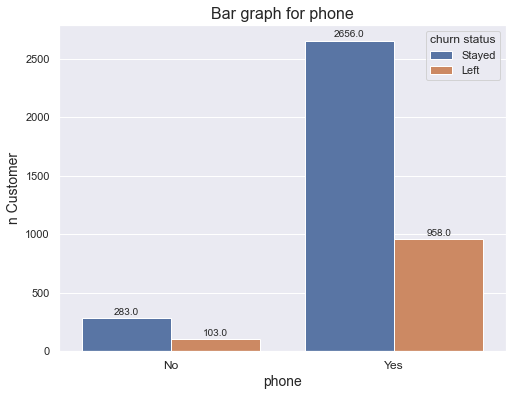

,phone,churn,count,churn status
0,0,0,283,Stayed
1,0,1,103,Left
2,1,0,2656,Stayed
3,1,1,958,Left


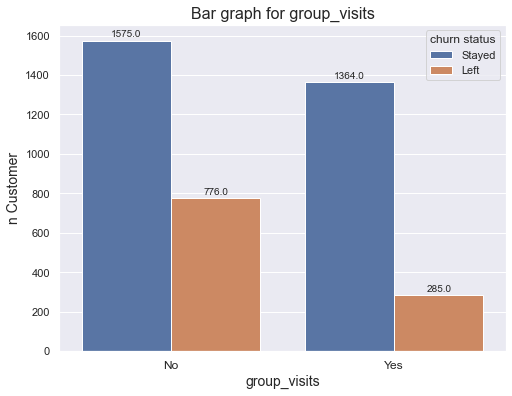

,group_visits,churn,count,churn status
0,0,0,1575,Stayed
1,0,1,776,Left
2,1,0,1364,Stayed
3,1,1,285,Left


In [9]:
# plotting barplot two compare two groups behaivior 
sns.set(style= "darkgrid")
column_Bar = {'gender':['Female','Male'],
              'near_location':['No','Yes'],
              'partner':['No','Yes'],
              'promo_friends':['No','Yes'], 
              'phone':['No','Yes'],
              'group_visits':['No','Yes']
             }

for i in column_Bar:
    df = us_gym_churn.groupby([i,'churn']).count().iloc[:,0:1].reset_index()
    df.columns = [*df.columns[:-1], 'count']
    df['churn status'] = df.churn.apply(lambda x: 'Stayed' if x == 0 else 'Left')
    df.sort_values(by= i,ascending= True,inplace= True)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(8,6)
    splot = sns.barplot(data= df,x= i,y= 'count', hue= 'churn status')
    
    ax.set_title('Bar graph for '+ i, size= 16)
    ax.set_ylabel('n Customer', size= 14)
    ax.set_xlabel(i, size= 14)
    ax.set_xticklabels(column_Bar[i], size= 12)
    
    for p in splot.patches:
        splot.annotate(format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext= (0, 6), 
                       textcoords = 'offset points')

   
    plt.show()
    display(df)
    print()
    print()

#### Conclusion

The above Bar graph shows the relationship between the binary features. Stayed legends means customer didn't churn and stayed in the gym and left means those who churned and left the gym.

1. Gender: There is no such difference between Male and Female parameter by churn status. There are almost equal number of female and male who left and those who are stayed in the gym.
2. Near Location: There is a big difference in churn status for those who live near to the gym. Those who live near the gym mostly statyed in the gym compare to those who left. There are few people who live far from the gym and also we found no such big difference in their churn status.
3. Partner: The customers who come from Partner company generally stayed with the gym and left(churn) less than who didn't come from Partner company.
4. Promo friends: Most of the customers comes without any reference from any friend and stayed with gym also more customers stayed who have any promo code. So it seems promo code does not impact the churn rate of customer.
5. Phone: Most of the customers provide their phone number and stayed with the gym. Also those who didn't share their phone number stayed with the gym more but the difference is low compare to other type. Almost more than double of customers stayed with the gym who provides the phone number. So it seems providing the number increase the chance to stays with the gym.
6. Group visit: The customer who likes to participate in group session tends towards to stayed with the gym more. There are almost 10 times more customer in stayed (didn't churn) group in Yes category compare to left group.

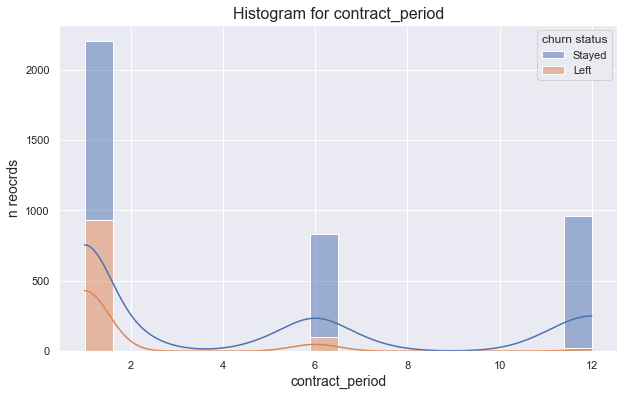

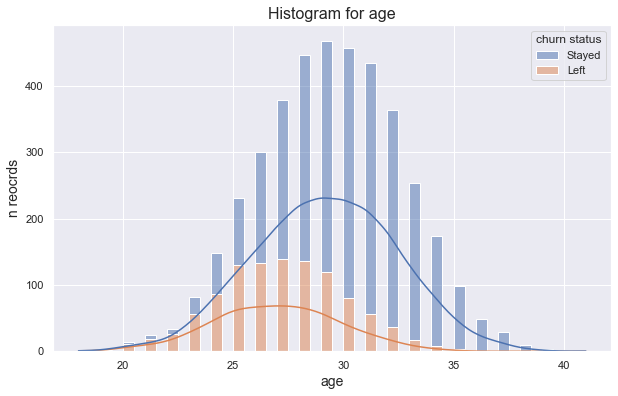

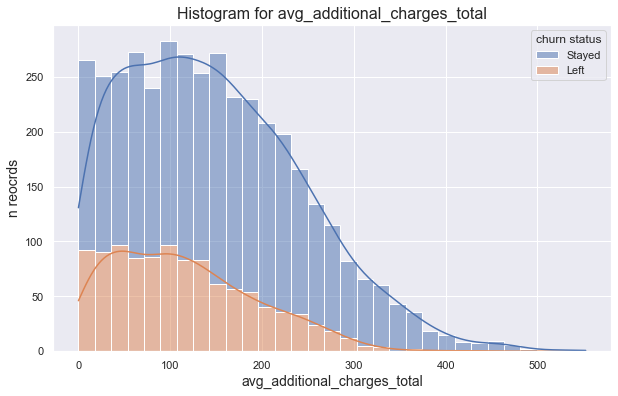

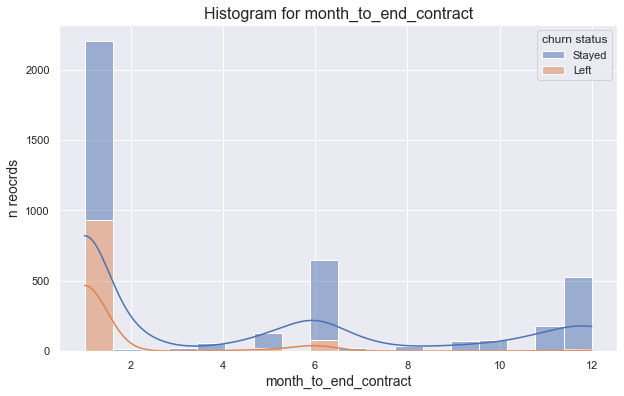

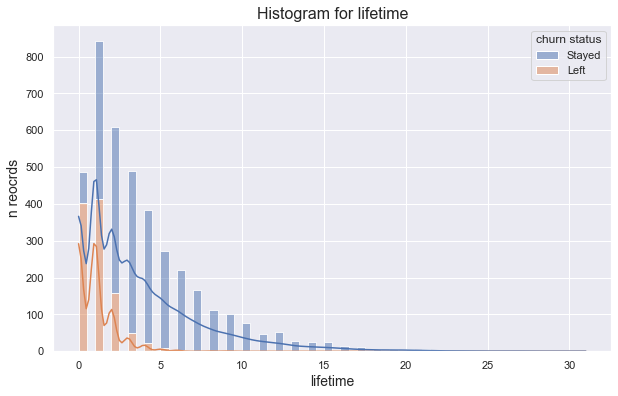

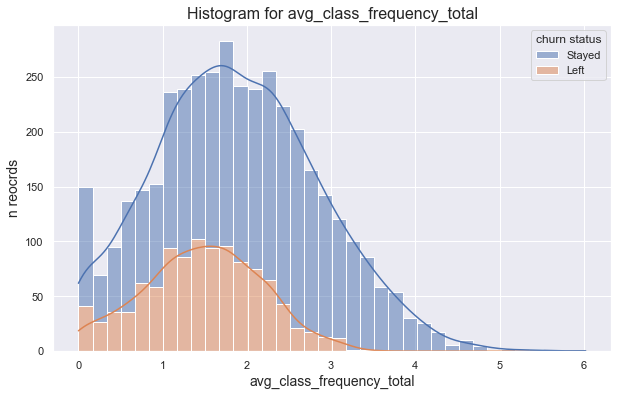

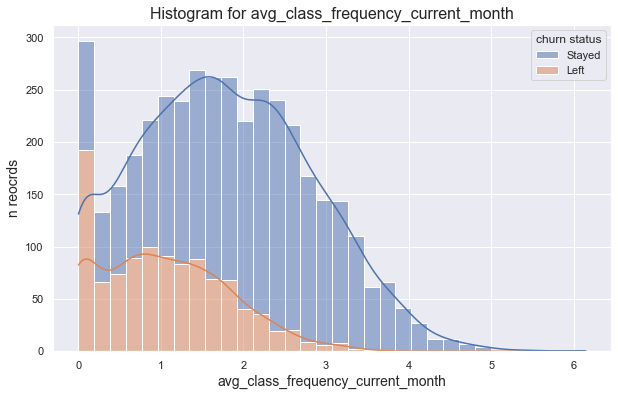

In [10]:
# plotting histograms based on two user groups to compare certain metrics

column_hist = ['contract_period',
               'age',
               'avg_additional_charges_total',
               'month_to_end_contract',
               'lifetime',
               'avg_class_frequency_total',
               'avg_class_frequency_current_month'
              ]

us_gym_churn['churn status'] = us_gym_churn.churn.apply(lambda x: 'Stayed' if x == 0 else 'Left')

for i in column_hist:
    
    fig, axs = plt.subplots()
    fig.set_size_inches(10,6)
    sns.histplot(data= us_gym_churn,
                 x= i,
                 color= 'skyblue',
                 kde= True,
                 ax= axs,
                 hue= 'churn status',
                 multiple= 'stack', 
             )
    
    axs.set_title('Histogram for '+ i, size= 16)
    axs.set_ylabel('n reocrds', size= 14)
    axs.set_xlabel(i, size= 14)
       
    fig.show()    

    
#fig.show()
us_gym_churn.drop('churn status', axis=1, inplace=True)

#### Conclusion

The above histogram graph shows the relationship between continuous numerical variable. Stayed legends means customer didn't churn and stayed in the gym and left means those who churned and left the gym.

1. Contract Period: Those who made a contract for 1 month have the highest % of churn rate among all others category and if the contract period increase we can see that churn rate decreases. Very few customer made a contract for 3 month.
2. Age: Most of the customer comes in the the age range 27-32. In the early 20th, the more is churn rate. As we move towards high age range the churn rate decreases. The more age of the customer increases the chance that customer will stay.
3. Avg. Additional Charges: Generally who spent more money on additional things stayed with the gym. As the additonal charges increases churn rate decreases.
4. Month to end Contract: Most of the customers have 1 month remaining until the contract expires. Churn rate is also high in this group. As the remaining months increases churn rate decreases.
5. lifetime: The graph shows that most of the users who left have been members for less than 3 months. However, after 4 month user generally didn't churn.
6. Avg. Class Frequency Total: Most of the users visit twice a week. Those who visit more than twice have less churn rate and who visited less than twice have high churn rate.
7. Avg. class Frequency Current Total: Most of the users visited the gym less than once in last month and also their churn rate is high. Who visited higher than twice have very low churn rate.

### 3.3 Correlation matrix

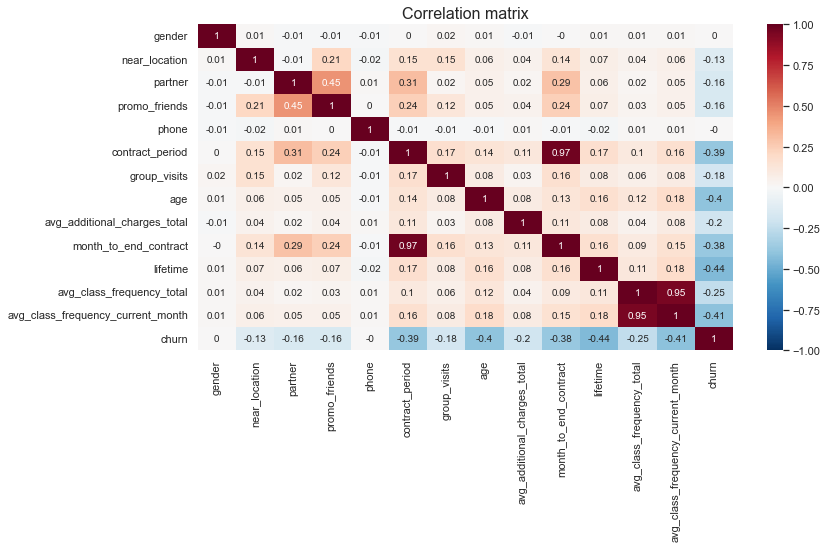

In [11]:
fig, ax = plt.subplots(figsize= (12, 6))
hmap = sns.heatmap(us_gym_churn.corr().round(2),
            annot= True,
            ax= ax,
            vmin= -1,
            vmax= 1,
            cmap= 'RdBu_r'
            )
ax.set_title('Correlation matrix', size= 16)

plt.show()

#### Conclusion

Above graph shows the correlation between the features. So after analysing the graph, we can conclude that contract_period and month_to_end_contract is highly correlated which means increase in contract_period also increase month_to_end_contract feature. Also avg_class_frequency_total and avg_class_frequency_current_month are highly correlated which is also obvious as increase in avg. visit in customer' lifetime also related with avg. visit of last month. There are also some features which are negatively correlated with churn like contract_period, age, month_to_end_contract, lifetime, avg_class_frequency_total, avg_class_frequency_current_month.

---
[Back to top](#top) | [Back to Chapterstart: Loading Data](#Data2)

## 4. Building model for predicting churn

### 4.1 Dividing Dataset

In [12]:
#removing columns which are highly correlated
us_gym_churn_final = us_gym_churn.drop(['contract_period','avg_class_frequency_current_month'], axis = 1)
us_gym_churn_final

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,1,29,14.227470,5,3,0.020398,0
1,0,1,0,0,1,1,31,113.202938,12,7,1.922936,0
2,0,1,1,0,1,0,28,129.448479,1,2,1.859098,0
3,0,1,1,1,1,1,33,62.669863,12,2,3.205633,0
4,1,1,1,1,1,0,26,198.362265,1,3,1.113884,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,0,33,2.406023,12,8,2.284497,0
3996,0,1,0,0,1,1,29,68.883764,1,1,1.277168,1
3997,1,1,1,1,1,0,28,78.250542,11,2,2.786146,0
3998,0,1,1,1,1,0,32,61.912657,5,3,1.630108,0


In [13]:
# divide the data into features (the X matrix) and a target variable (y)
X = us_gym_churn_final.drop('churn', axis= 1)
y = us_gym_churn_final['churn']

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)


# create a StandardScaler object and apply it to the train set
scaler = StandardScaler() 
X_train_st = scaler.fit_transform(X_train) # train the scaler and transform the matrix for the train set

# apply standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

# declare the list of models
models = [LogisticRegression(random_state= 0), RandomForestClassifier(random_state= 0)]



def predictions(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(BOLD + f'\tModel: {model}' + END)
    print(f'\tAccuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'\tPrecision: {precision_score(y_test, y_pred):.2f}')
    print(f'\tRecall: {recall_score(y_test, y_pred):.2f}')
    print('\t')

    


# write a loop that outputs metrics for each model
for i in models:
    
    predictions(i,X_train, y_train, X_test, y_test)

	Model: LogisticRegression(random_state=0)
	Accuracy: 0.89
	Precision: 0.78
	Recall: 0.78
	
	Model: RandomForestClassifier(random_state=0)
	Accuracy: 0.90
	Precision: 0.80
	Recall: 0.77
	


#### Conclusion:

First we have removed one of those columns which are highly correlated. After that divide the data into train and test sets using train_test_split method. Here we use 'logistic regression', 'random forest' methods to train our model. We calculate 3 metrics to evaluate which model suits best here.

1. Accuracy : This is the share of accurate predictions among all predictions. The closer we are to 100% accuracy, the better. This metric shows, RandomForestClassifier is better.
2. Precision: Precision tells us what share of predictions in class 1 are true. In other words, we look at the share of correct answers only in the target class. This metric return numeric values from 0 to 1. The more closer to 1, the better. So as per this again RandomForestClassifier is better.
3. Recall: he second metric aims at minimizing the opposite risks. Recall demonstrates the number of real class 1 objects you were able to discover with your model. This metric is useful in diagnosing diseases. This metric also takes values from 0 to 1. The closer to 1, the better. So as per this also RandomForestClassifier is better.

So from the above analysis, we can conclude that RandomForestClassifier is better.

---
[Back to top](#top) | [Back to Chapterstart: Loading Data](#Data2)

## 5. User cluster

[5.1 Standardize the data](#testing1)  <br>
[5.2 Dendrogram](#average_rev_by_plans1) <br>
[5.3 K-means](#average_rev_by_regions1) <br>
[5.4 Mean features for the clusters](#average_rev_by_regions1) <br>
[5.5 Distribution of features for the clusters](#average_rev_by_regions1) <br>
[5.6 Churn rate for each user](#conclusion_hypo1) <br>

### 5.1 Standardize the data

In [14]:
# creating a scaler class object (normalizer)
scaler = StandardScaler()

# training the normalizer and transforming the dataset
x_sc = scaler.fit_transform(X) 

### 5.2 Dendrogram

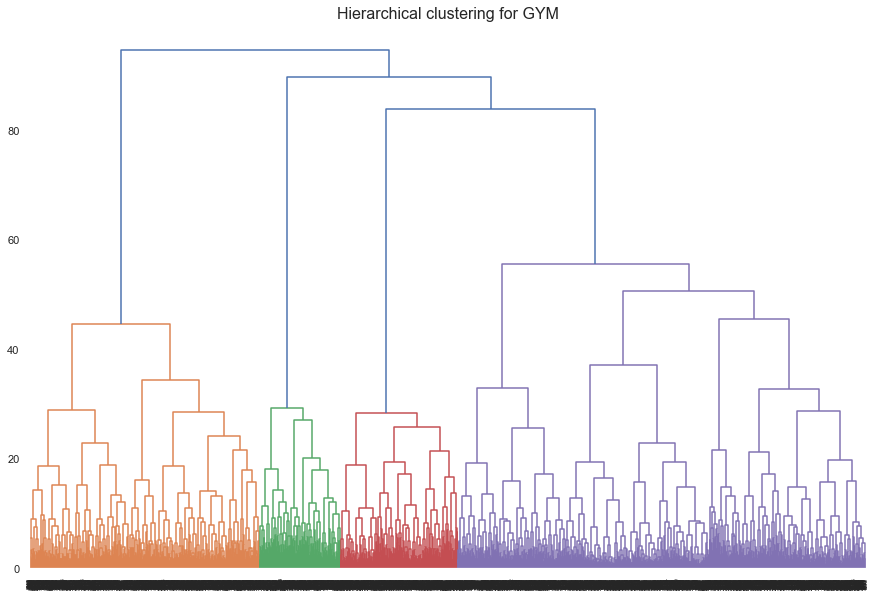

In [15]:
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize= (15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM', size= 16)
plt.show() 

### 5.3 K-means

In [16]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5)

# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(x_sc) 

### 5.4 Mean features for the clusters

In [17]:
# store cluster labels in the field of our dataset
us_gym_churn_final['cluster_km'] = labels

# get the statistics of the mean feature values per cluster
df_cluster = us_gym_churn_final.groupby('cluster_km').mean()
display(df_cluster)

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.500898,0.000000,0.488330,0.077199,1.0,0.231598,28.685817,137.277472,2.804309,2.978456,1.762672,0.402154
1,0.533333,0.995833,0.387500,0.018750,1.0,0.547917,30.843750,179.822272,5.838542,5.585417,2.296463,0.020833
2,0.496988,0.994980,0.895582,0.997992,1.0,0.520080,29.507028,151.579232,6.300201,4.176707,1.943522,0.133534
3,0.502271,1.000000,0.207993,0.055404,1.0,0.282470,27.657584,119.931613,1.930064,1.995459,1.524245,0.527702
4,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839


#### Conclusion

Here we used KMeans algorithm for clustering with n_clusters = 5. This algorithm divides the whole data in 5 groups. After that we take mean features values for all clusters. Below are the some observations:

1. Cluster 0: This cluster contains all customers who don't live near to gym. Customer is almost divided equally in male and female category. All data contains phone number.
2. Cluster 1: This cluster contains all customers who live near to gym. Customer is almost divided equally in male and female category. Customers contract period is going to end in next 2 months. Approx. 50% of customers like to churn in this group.
3. Cluster 2: 99% customer lives near to the gym. Customer is almost divided equally in male and female category. Most of the customer comes from partner company and also got reference from friend. Phone number is provided by all customers. Half of customers in this group like to participate in group sessions. Customers contract period is going to end in next 6 months. Most of customers don't like to churn in this group. Customers average age 30.
4. Cluster 3: 99% customer lives near to the gym. Customer is almost divided equally in male and female category. Very small share of customers got reference from friends. Phone number is provided by all customers. Half of the customers in this group like to participate in group sessions. This group customer's spent highest on additional services. Also customers in this group have highest lifetime among all. Their average age is 31. Generally customer comes twice or more in a week in this group. This group have lowest churn rate among all. So we can say that cluster 1 and cluster 3 have lowest churnt rate and their average age is between 30 and 31. which we also found previously.
5. Cluster 4: This cluster contains all customers who didn't provide their phone number.Almost 86% of customer lives near gym. Their average age 29. Customer generally comes twice in a week in this group. Their churn rate is also low compare to cluster 0 and cluster 1.

### 5.5 Distribution of features for the clusters

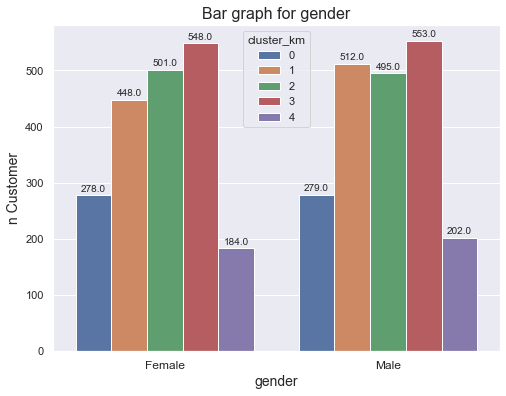

,gender,cluster_km,count
0,0,0,278
1,0,1,448
2,0,2,501
3,0,3,548
4,0,4,184
5,1,0,279
6,1,1,512
7,1,2,495
8,1,3,553
9,1,4,202


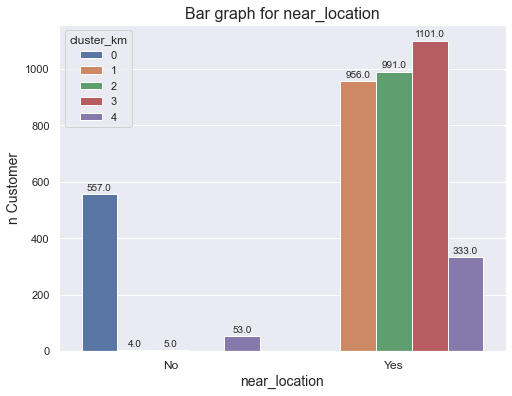

,near_location,cluster_km,count
0,0,0,557
1,0,1,4
2,0,2,5
3,0,4,53
4,1,1,956
5,1,2,991
6,1,3,1101
7,1,4,333


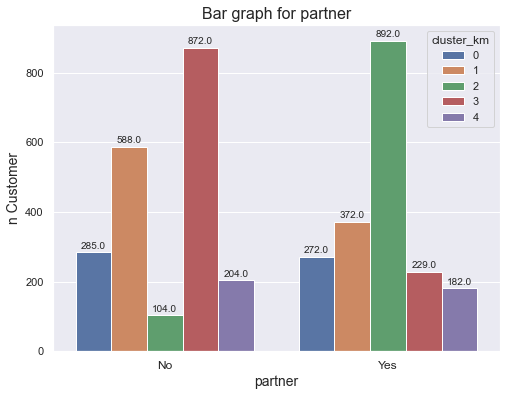

,partner,cluster_km,count
0,0,0,285
1,0,1,588
2,0,2,104
3,0,3,872
4,0,4,204
5,1,0,272
6,1,1,372
7,1,2,892
8,1,3,229
9,1,4,182


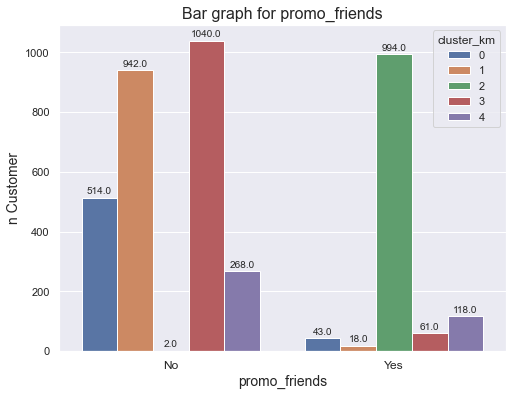

,promo_friends,cluster_km,count
0,0,0,514
1,0,1,942
2,0,2,2
3,0,3,1040
4,0,4,268
5,1,0,43
6,1,1,18
7,1,2,994
8,1,3,61
9,1,4,118


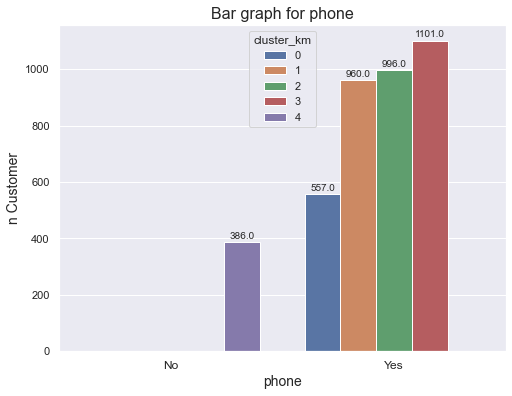

,phone,cluster_km,count
0,0,4,386
1,1,0,557
2,1,1,960
3,1,2,996
4,1,3,1101


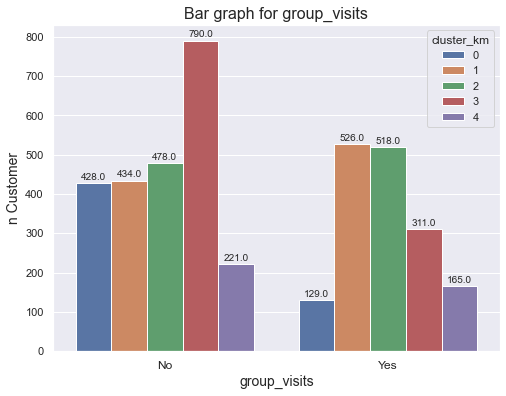

,group_visits,cluster_km,count
0,0,0,428
1,0,1,434
2,0,2,478
3,0,3,790
4,0,4,221
5,1,0,129
6,1,1,526
7,1,2,518
8,1,3,311
9,1,4,165


In [18]:
# Using the same column_Bar Index as in the EDA

for i in column_Bar:
    
    df_cluster_ = us_gym_churn_final.groupby([i,'cluster_km']).count().iloc[:,0:1].reset_index()
    df_cluster_.columns = [*df_cluster_.columns[:-1], 'count']
    
    fig, ax = plt.subplots()
    fig.set_size_inches(8,6)
    
    splot_cluster = sns.barplot(data= df_cluster_,
                     x= i,
                     y= 'count',
                     hue= "cluster_km")
    
    ax.set_title('Bar graph for '+ i, size= 16)
    ax.set_ylabel('n Customer', size= 14)
    ax.set_xlabel(i, size= 14)
    ax.set_xticklabels(column_Bar[i], size= 12)

    for p in splot_cluster.patches:
        splot_cluster.annotate(format(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext= (0, 6), 
                       textcoords = 'offset points')


    plt.show()
    display(df_cluster_)
    print()
    print()

#### Conclusion

1. Gender: Cluster 3 contains highest number of data. Male and Female are almost equaly divided in all clusters.
2. Near Location: cluster 2 contains all customer who does not live near gym, cluster 4 contain data of both types who live or doesn't live near the gym but share of 'No' type is very less, rest of the clusters conatin only those customer who lives near the gym. In this graph also cluster 3 contains highest number of customers.
3. Partner: cluster 0 contain highest number of customers who come from Partner company.
4. Promo friend: Most of the customer comes without any reference. only those customer who belongs to cluster 0 mostly comes from partner company.
5. Phone: Only cluster 4 contains those customer who have not provided their phone number otherwise customers in all other clusters provided their number.
6. Group visit: cluster 1 contains only those customers who participate in group discussion while cluster 3 contain only those who does not participate in group discussion.

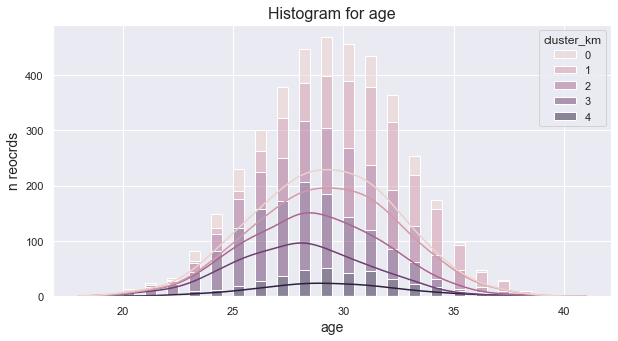

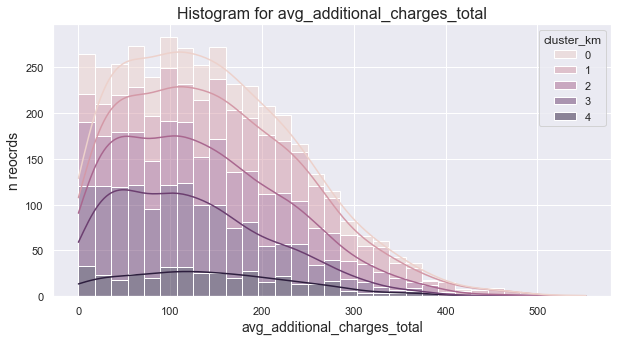

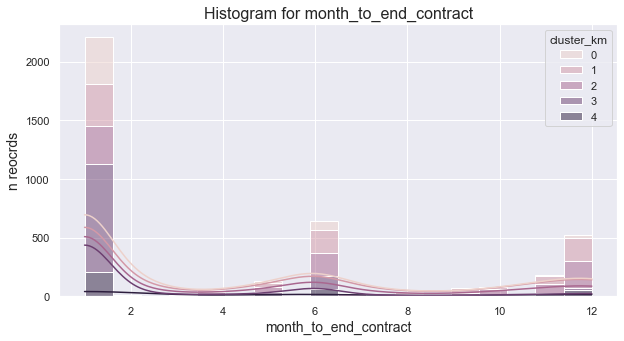

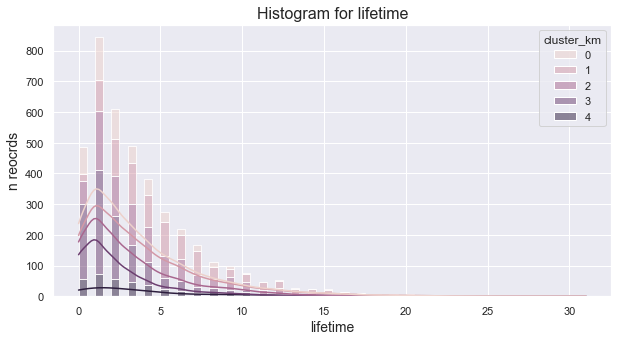

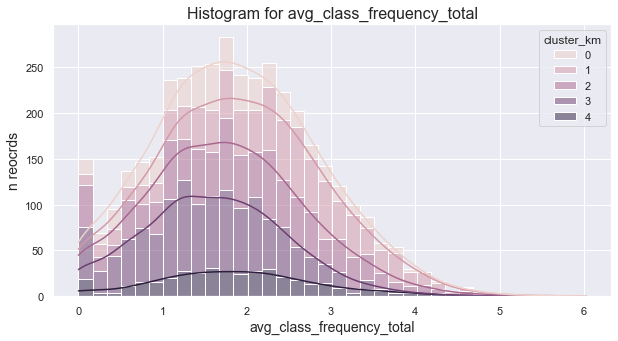

In [19]:
#sns.set(style="darkgrid")
column_hist_ = ['age',
              'avg_additional_charges_total',
              'month_to_end_contract',
              'lifetime',
              'avg_class_frequency_total'
               ]

color = sns.cubehelix_palette(start= .5, rot=-.75, as_cmap= True)
for i in column_hist_:

    fig, axs = plt.subplots(figsize= (10, 5))
    sns.histplot(data= us_gym_churn_final,
                 x= i,
                 color= color,
                 kde= True,
                 ax= axs,
                 hue= "cluster_km",
                 multiple= "stack")
    
    #axs.set(xlabel=i, ylabel='No. of records',title='Histogram for '+ i) 
    
    axs.set_title('Histogram for '+ i, size= 16)
    axs.set_ylabel('n reocrds', size= 14)
    axs.set_xlabel(i, size= 14)
    
fig.show()

#### Conclusion

1. Age: Most of the customer's age is between 28-31. cluster 3 contain highest number of customer in almost all age range while cluster 4 contain lowest number of customers.
2. Ave. Additional Charges Total: Most of the customers spent less than 200 in additional services.
3. Month to end contract: Most of customers contract is going to end in next 1 month then 6 month and then 12 month. cluster 0 group customers have the highest share in 12 month contract.
4. Lifetime: Most of the customer lifetime is 1 month in which large share belong to cluster 3.
5. Average Class Frequency Total: Most of the customer visit the gym between 1 to 3 times in a week. cluster 3 contains large proportion of customers in almost every range.

### 5.6 Churn rate for each user

In [20]:
df_cluster_churn = us_gym_churn_final.groupby('cluster_km').agg({'churn':['count','sum']})
df_cluster_churn.columns = ['count','churn_count']
df_cluster_churn.reset_index(inplace= True)
df_cluster_churn['churn_rate%'] = round(((df_cluster_churn['churn_count']/df_cluster_churn['count'])*100),2)
df_cluster_churn = df_cluster_churn.sort_values(by= 'churn_rate%')
display(df_cluster_churn)

,cluster_km,count,churn_count,churn_rate%
1,1,960,20,2.08
2,2,996,133,13.35
4,4,386,103,26.68
0,0,557,224,40.22
3,3,1101,581,52.77


#### Conclusion:

Cluster 2, cluster 3 and cluster 4 have the highest churn rate (in order ) while cluster 0 and cluster 1 have the lowest. which means customer who belongs to cluster 0 and cluster 1 stayed with gym more than any other cluster.

 ---
 [Back to top](#top) | [Back to Chapterstart: Loading Data](#Data2)

### 6. Final Conclusion and recoomendations

As per my analysis, I observe/suggest following points to improve customer retention:

1. We should attract the people who lives near the gym beacuse their retention is more. We can ask our markrting department to plan to attract local customer.
2. We should ask all the customer to provide their phone number so that in case they didn't come, we can call them and convince to come back to gym.
3. Customer who comes from partner company generally stayed with the gym more. So we should try to attract employees of partner company, we can offer them some extra offer.
4. We can ask/encourage customers to come to group session, as we see above those who come to group session churn less than others. For this we can arrange some interesting group activities or can call motivational speaker so that customer gets attracts to comes to group session.
5. We can also encourage or provide some attractive offer to customer to make contract for more than 3 month like for 6 or 12 months. This will also increase retention of customer.
6. The customer who comes in the age group 29-31+ have lowest churn rate.
7. The customer who spent more on additional services and comes twice or more generally stayed with gym more. So for this we can offer some good discount to those who come more than twice like third visit will be on nominal charges and also additional services cost will be very low.
8. The customer whose contract period is going to end in next 1 or 2 month should be given more attention or give them some good offer so that they renew their membership.

So from the above points we can say that the customers who lives near the gym, comes in the age range between 29-31 generally comes in group session, spent more on additional services, have highest lifetime and comes twice or more in a week, have lowest churn rate among all.

[Back to top](#top) | [Back to Chapterstart: Loading Data](#Data2)